In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#set plot style
import seaborn as sns; sns.set_theme()
sns.set_style("whitegrid", {"grid.color": ".1", "grid.linestyle":":"})
sns.set_palette(sns.dark_palette('seagreen'),7, .50)

#import training libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

import joblib

In [215]:
w_wine = pd.read_csv('winequality-white.csv',sep=';')
w_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [216]:
w_wine.shape

(4898, 12)

In [217]:
#look for null values
w_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [218]:
w_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


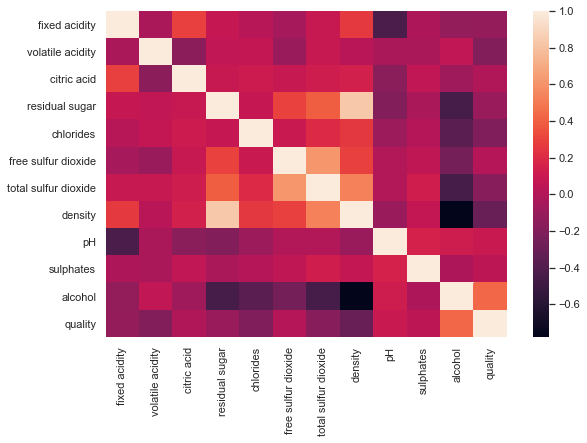

In [219]:
#get the df correlation
wine_corr = w_wine.corr()

#plot using a heatmap
plt.figure(figsize=(9,6))

sns.heatmap(wine_corr)

#plot params
plt.show()

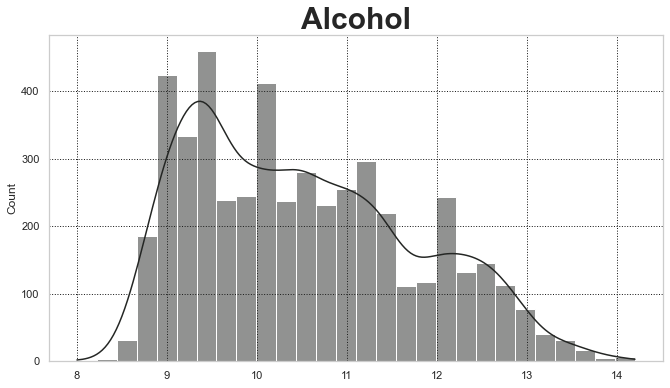

In [392]:
#plot a hist plot for quality
#plot params
plt.figure(figsize=(11,6))
plt.title('Alcohol',fontdict={'fontsize':30,'fontweight':'bold'})

sns.histplot(w_wine.alcohol,kde=True)

plt.xlabel('')
plt.show()

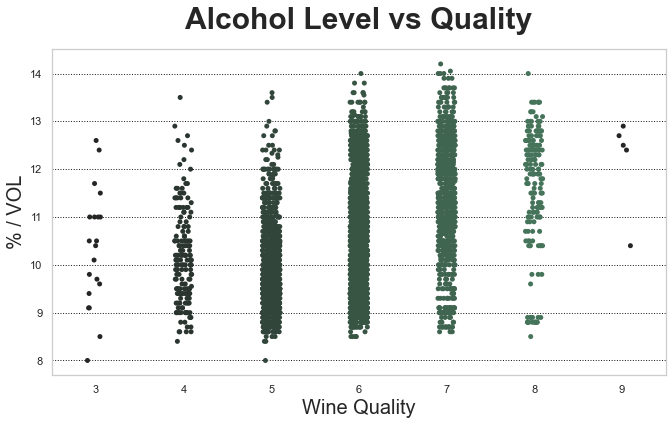

In [391]:
#plot params
plt.figure(figsize=(11,6))
plt.title('Alcohol Level vs Quality',pad = 20, fontdict={'fontsize':30,'fontweight':'bold'})

#stripplot
sns.stripplot(data=w_wine, x='quality', y='alcohol' )

#plot params
plt.xlabel('Wine Quality', fontdict={'fontsize':20})
plt.ylabel('% / VOL', fontdict={'fontsize':20})
plt.show()

# Data Cleaning

## Clean the outliers for residual sugars


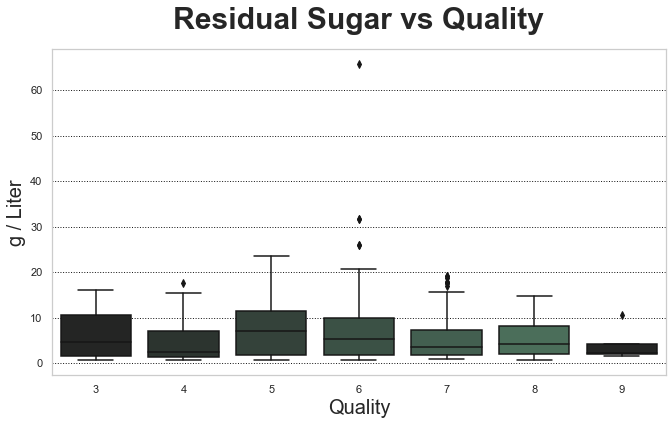

In [222]:
#plot params
plt.figure(figsize=(11,6))
plt.title('Residual Sugar vs Quality', pad=20, fontdict={'fontsize':30,'fontweight':'bold'})

#scatterplot
sns.boxplot(data = w_wine, x='quality',y = 'residual sugar')

#plot params
plt.ylabel('g / Liter',fontdict={'fontsize':20})
plt.xlabel('Quality', fontdict={'fontsize':20})
plt.show()

Wine with the quality rating of 6 has the most apparent outliers, we will need to remove them.

In [223]:
#show stats for residual sugar
w_wine['residual sugar'].describe()

count    4898.000000
mean        6.391415
std         5.072058
min         0.600000
25%         1.700000
50%         5.200000
75%         9.900000
max        65.800000
Name: residual sugar, dtype: float64

Residual sugar holds the mean of 6.4 grams and a standard deviation of 5, we will cut off the outliers at +2 standard deviations.

In [252]:
#use .quantile 95% to remove outliers above 2 standard deviations
#get the lower and upper limits of residual sugar
res_sug_min, res_sug_max = w_wine['residual sugar'].quantile([.05,.95])

#create a new dataframe without the outliers
w_wine1 = w_wine.loc[(w_wine['residual sugar']>res_sug_min) & (w_wine['residual sugar']<res_sug_max)].copy()

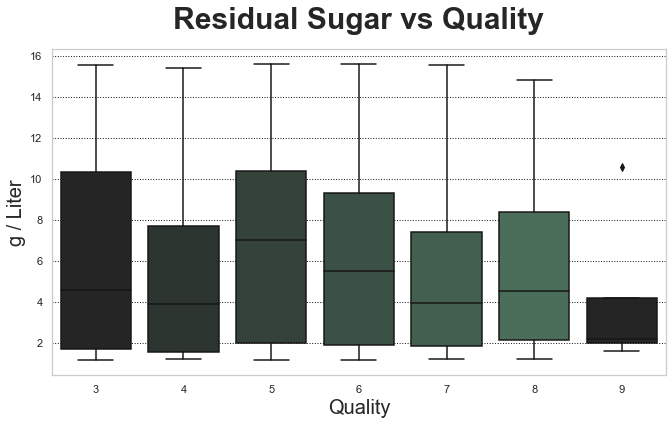

In [390]:
#plot residual sugar using the new dataframe
#plot params
plt.figure(figsize=(11,6))
plt.title('Residual Sugar vs Quality', pad=20, fontdict={'fontsize':30,'fontweight':'bold'})

#scatterplot
sns.boxplot(data = w_wine1, x='quality',y = 'residual sugar')

#plot params
plt.ylabel('g / Liter',fontdict={'fontsize':20})
plt.xlabel('Quality', fontdict={'fontsize':20})
plt.show()

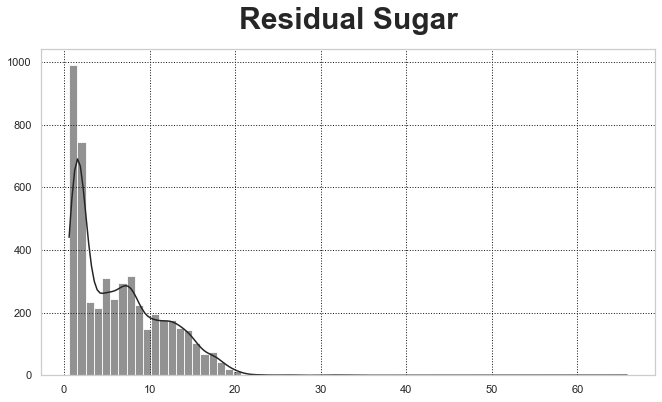

In [388]:
#plot the residual sugar distribution
plt.figure(figsize=(11,6))
plt.title('Residual Sugar', pad=20, fontdict={'fontsize':30,'fontweight':'bold'})

sns.histplot(data=w_wine, x='residual sugar',kde=True)

plt.ylabel('')
plt.xlabel('')
plt.show()

The outliers for residual sugar have been removed but we keep a postitive distribution.

In [255]:
w_wine1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4332.000000,4332.000000,4332.000000,4332.000000,4332.000000,4332.000000,4332.000000,4332.000000,4332.000000,4332.000000,4332.000000,4332.000000
mean,6.860446,0.280015,0.332537,6.118779,0.045761,35.497576,139.319483,0.993900,3.191669,0.493047,10.567778,5.909280
std,0.828572,0.100428,0.117848,4.289680,0.022290,17.057093,41.902354,0.002692,0.150683,0.115510,1.229277,0.893723
min,3.800000,0.080000,0.000000,1.150000,0.009000,2.000000,18.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.900000,0.036000,24.000000,109.000000,0.991780,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.310000,5.300000,0.043000,34.000000,135.000000,0.993800,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.320000,0.380000,9.200000,0.050000,46.000000,168.000000,0.995810,3.280000,0.550000,11.400000,6.000000
max,11.800000,1.100000,1.660000,15.600000,0.346000,289.000000,440.000000,1.000800,3.820000,1.080000,14.200000,9.000000


## Clean sulfur dioxide outliers

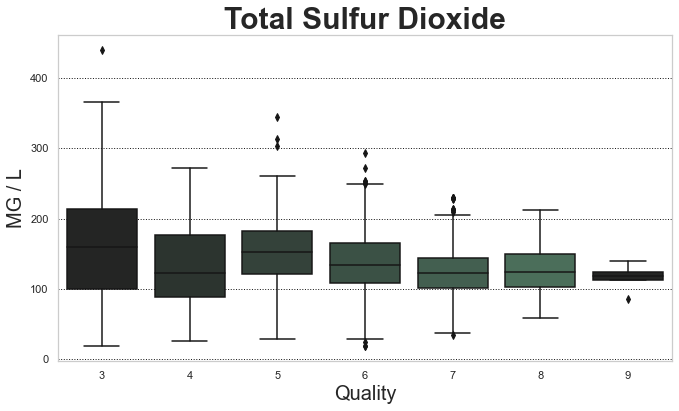

In [256]:
#plot params
plt.figure(figsize=(11,6))
plt.title('Total Sulfur Dioxide',fontdict={'fontsize':'30','fontweight':'bold'})

sns.boxplot(data=w_wine1, y='total sulfur dioxide',x='quality')

plt.xlabel('Quality',fontdict={'fontsize':20})
plt.ylabel('MG / L',fontdict={'fontsize':20})
plt.show()

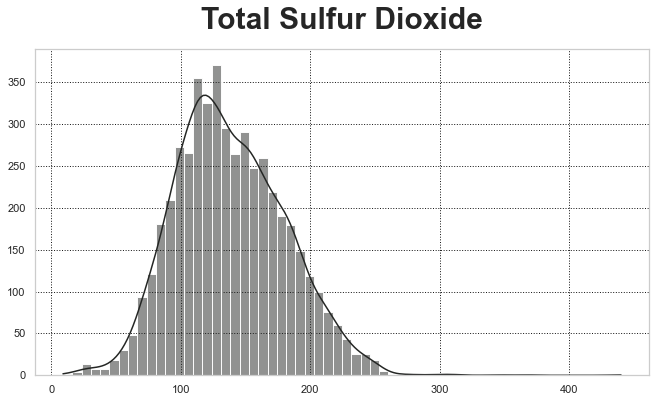

In [257]:
#plot the total sulfur dioxide distribution
plt.figure(figsize=(11,6))
plt.title('Total Sulfur Dioxide', pad=20, fontdict={'fontsize':30,'fontweight':'bold'})

sns.histplot(data=w_wine, x='total sulfur dioxide',bins=60,kde=True)

plt.ylabel('')
plt.xlabel('')
plt.show()

In [258]:
#show stats for total sulfur dioxide
w_wine1['total sulfur dioxide'].describe()

count    4332.000000
mean      139.319483
std        41.902354
min        18.000000
25%       109.000000
50%       135.000000
75%       168.000000
max       440.000000
Name: total sulfur dioxide, dtype: float64

We will remove anything above 2 standard deviations from total sulfur dioxide.

In [259]:
#use .quantile 95% on total sulfur dioxide to remove outliers
#so2 = sulfur dioxide
so2_min,so2_max = w_wine1['total sulfur dioxide'].quantile([.05,.95])

w_wine2 = w_wine1.loc[(w_wine1['total sulfur dioxide']>so2_min) & (w_wine1['total sulfur dioxide']<so2_max)].copy()

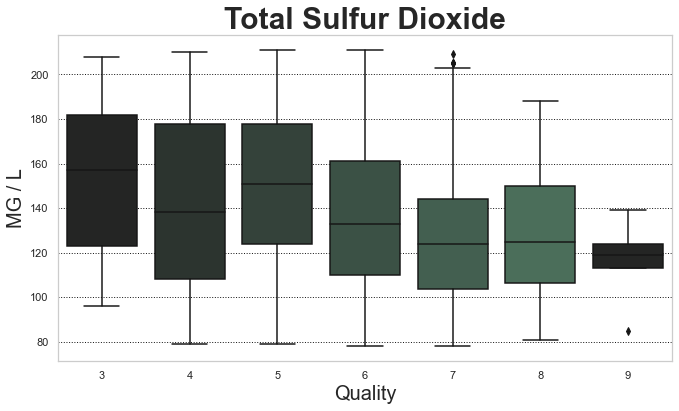

In [387]:
#plot total sulfur dioxide using the new data frame
#plot params
plt.figure(figsize=(11,6))
plt.title('Total Sulfur Dioxide',fontdict={'fontsize':'30','fontweight':'bold'})

sns.boxplot(data=w_wine2, y='total sulfur dioxide',x='quality')

plt.xlabel('Quality',fontdict={'fontsize':20})
plt.ylabel('MG / L',fontdict={'fontsize':20})
plt.show()

The outliers for Sulfur Dioxide have been removed.

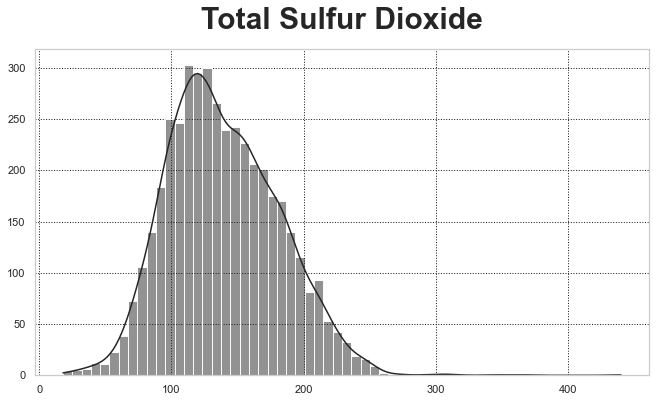

In [386]:
#plot the total sulfur dioxide distribution
plt.figure(figsize=(11,6))
plt.title('Total Sulfur Dioxide', pad=20, fontdict={'fontsize':30,'fontweight':'bold'})

sns.histplot(data=w_wine1, x='total sulfur dioxide',bins=60,kde=True)

plt.ylabel('')
plt.xlabel('')
plt.show()

The distribution for Total Sulfur Dioxide stayed roughly the same.

In [262]:
w_wine2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000
mean,6.854231,0.277667,0.332217,6.075116,0.045684,35.541795,138.308642,0.993859,3.193537,0.492204,10.584961,5.940329
std,0.820197,0.098100,0.117592,4.267172,0.021608,15.487129,33.359889,0.002651,0.150537,0.116705,1.226348,0.880886
min,3.800000,0.080000,0.000000,1.150000,0.009000,2.000000,78.000000,0.987130,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.900000,0.036000,24.000000,112.000000,0.991780,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.310000,5.200000,0.043000,34.000000,134.500000,0.993755,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.380000,9.100000,0.050000,45.000000,164.000000,0.995780,3.280000,0.550000,11.400000,6.000000
max,11.800000,1.100000,1.660000,15.600000,0.346000,124.000000,211.000000,1.000800,3.820000,1.080000,14.200000,9.000000


## Clean Chloride outliers

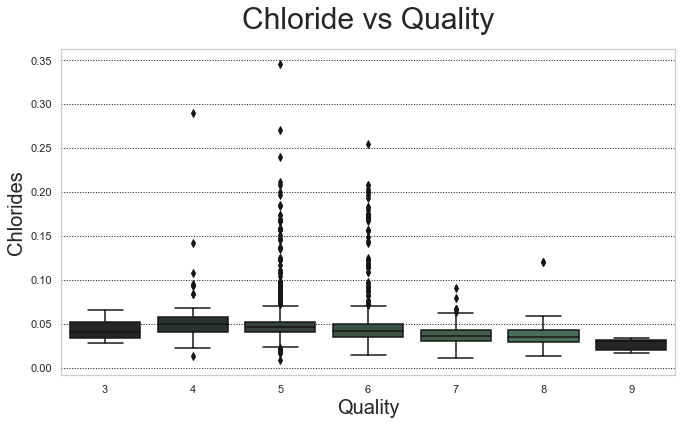

In [263]:
#Chloride vs quality
plt.figure(figsize=(11,6))
plt.title('Chloride vs Quality', pad= 20, fontdict={'fontsize':30})

#plot
sns.boxplot(data=w_wine2,x='quality',y='chlorides')

#label params
plt.ylabel(ylabel='Chlorides',fontdict={'fontsize':20})
plt.xlabel(xlabel='Quality',fontdict={'fontsize':20})
plt.show()

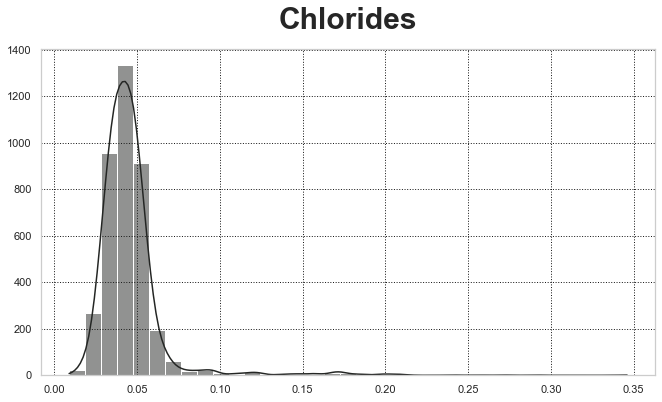

In [264]:
#plot the cloride distribution
plt.figure(figsize=(11,6))
plt.title('Chlorides', pad=20, fontdict={'fontsize':30,'fontweight':'bold'})

sns.histplot(data=w_wine2, x='chlorides',bins=35,kde=True)

plt.ylabel('')
plt.xlabel('')
plt.show()

In [265]:
w_wine.chlorides.describe()

count    4898.000000
mean        0.045772
std         0.021848
min         0.009000
25%         0.036000
50%         0.043000
75%         0.050000
max         0.346000
Name: chlorides, dtype: float64

We will be removing outliers above 3 standard deviations.

In [266]:
#grab the min and max threshold for chlorides using .quantile(.95)
chl_min,chl_max = w_wine2['chlorides'].quantile([.05,.95])

#create a third dataframe to remove outliers for chloride
w_wine3 = w_wine2.loc[(w_wine2['chlorides']>chl_min) & (w_wine2['chlorides']<chl_max)].copy()

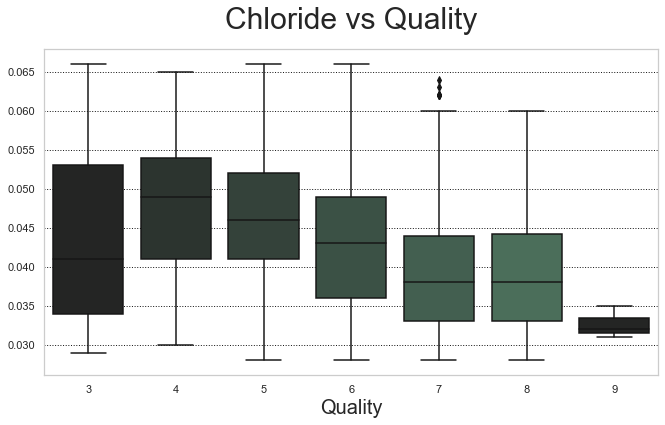

In [385]:
#Chloride plot
plt.figure(figsize=(11,6))
plt.title('Chloride vs Quality', pad= 20, fontdict={'fontsize':30})

#plot
sns.boxplot(data=w_wine3,x='quality',y='chlorides')

#label params
plt.ylabel('')
plt.xlabel(xlabel='Quality',fontdict={'fontsize':20})
plt.show()

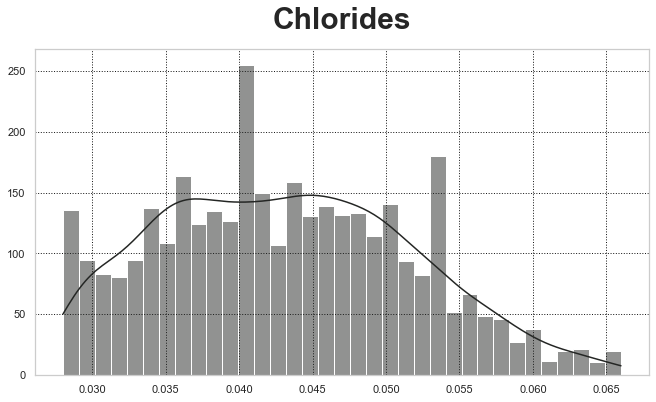

In [394]:
#plot the total sulfur dioxide distribution
plt.figure(figsize=(11,6))
plt.title('Chlorides', pad=20, fontdict={'fontsize':30,'fontweight':'bold'})

sns.histplot(data=w_wine3, x='chlorides',bins=35,kde=True)

plt.ylabel('')
plt.xlabel('')
plt.show()

Now that the outliers for the chlorides have been removed, the distribution looks a lot more normal.

In [269]:
w_wine3.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000
mean,6.867969,0.274254,0.331085,6.193640,0.043206,35.818575,139.077300,0.993961,3.197251,0.493804,10.553624,5.933083
std,0.822808,0.097020,0.113624,4.322791,0.008593,15.607268,33.284499,0.002635,0.149615,0.117024,1.189852,0.870507
min,3.800000,0.080000,0.000000,1.150000,0.028000,2.000000,78.000000,0.987420,2.720000,0.230000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.900000,0.036000,25.000000,113.000000,0.991840,3.100000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.310000,5.400000,0.043000,34.000000,136.000000,0.993880,3.190000,0.480000,10.400000,6.000000
75%,7.400000,0.320000,0.380000,9.450000,0.049000,46.000000,164.000000,0.995800,3.290000,0.550000,11.400000,6.000000
max,11.800000,1.100000,0.910000,15.600000,0.066000,124.000000,211.000000,1.000800,3.820000,1.080000,14.200000,9.000000


## Clean Fixed Acidity outliers

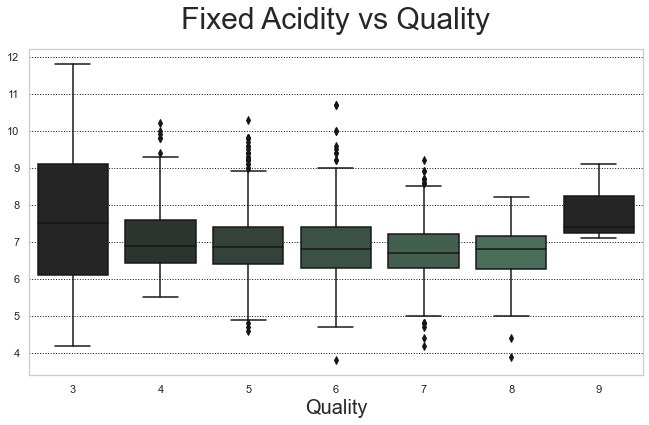

In [270]:
#fixed acidity vs quality
plt.figure(figsize=(11,6))
plt.title('Fixed Acidity vs Quality', pad= 20, fontdict={'fontsize':30})

#plot
sns.boxplot(data=w_wine3,x='quality',y='fixed acidity')

#label params
plt.ylabel('')
plt.xlabel(xlabel='Quality',fontdict={'fontsize':20})
plt.show()

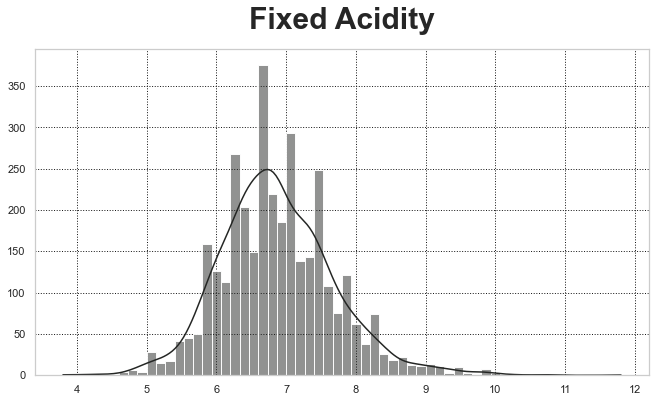

In [271]:
#plot the fixed acidity distribution
plt.figure(figsize=(11,6))
plt.title('Fixed Acidity', pad=20, fontdict={'fontsize':30,'fontweight':'bold'})

sns.histplot(data=w_wine3, x='fixed acidity',bins=60,kde=True)

plt.ylabel('')
plt.xlabel('')
plt.show()

In [272]:
w_wine3['fixed acidity'].describe()

count    3467.000000
mean        6.867969
std         0.822808
min         3.800000
25%         6.300000
50%         6.800000
75%         7.400000
max        11.800000
Name: fixed acidity, dtype: float64

In [273]:
#use .quantile(.95) to remove anything above 2 standard deviations
FA_min,FA_max = w_wine3['fixed acidity'].quantile([.05,.95])

w_wine4 = w_wine3.loc[(w_wine3['fixed acidity']>FA_min) & (w_wine3['fixed acidity']<FA_max)].copy()

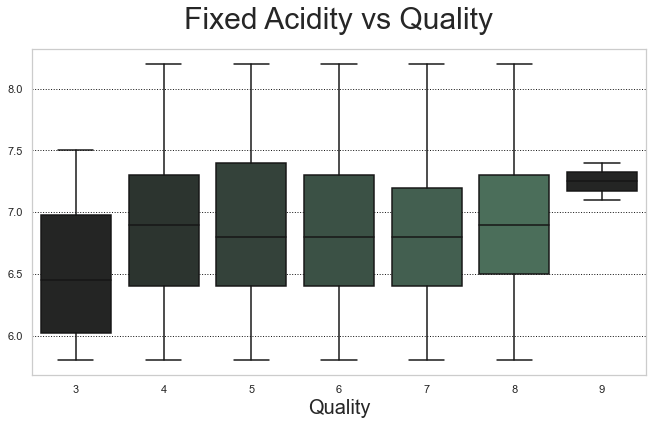

In [395]:
#fixed acidity vs quality
plt.figure(figsize=(11,6))
plt.title('Fixed Acidity vs Quality', pad= 20, fontdict={'fontsize':30})

#plot
sns.boxplot(data=w_wine4,x='quality',y='fixed acidity')

#label params
plt.ylabel('')
plt.xlabel(xlabel='Quality',fontdict={'fontsize':20})
plt.show()

#plot the fixed acidity distribution
plt.figure(figsize=(16,8))
plt.title('Fixed Acidity', pad=20, fontdict={'fontsize':30,'fontweight':'bold'})

sns.histplot(data=w_wine4, x='fixed acidity',bins=25,kde=True)

plt.ylabel('')
plt.xlabel('')
plt.show()

In [276]:
w_wine4.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000
mean,6.857415,0.272275,0.331708,6.310104,0.043487,36.352999,140.053129,0.993991,3.192709,0.494198,10.538075,5.942634
std,0.594316,0.092433,0.109394,4.352951,0.008591,15.533872,33.467874,0.002616,0.142990,0.114181,1.189559,0.861430
min,5.800000,0.080000,0.000000,1.200000,0.028000,2.000000,78.000000,0.987790,2.800000,0.230000,8.400000,3.000000
25%,6.400000,0.210000,0.270000,2.000000,0.037000,25.000000,114.000000,0.991840,3.100000,0.420000,9.500000,5.000000
50%,6.800000,0.260000,0.310000,5.700000,0.043000,35.000000,137.000000,0.993900,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.320000,0.380000,9.600000,0.050000,47.000000,166.000000,0.995880,3.280000,0.550000,11.400000,6.000000
max,8.200000,1.100000,0.910000,15.600000,0.066000,112.000000,211.000000,1.000600,3.810000,1.080000,14.200000,9.000000


# Feature Engineering

We will split the wine quality into two categories of low and high quality. The threshold for low quality wine is any wine less than or equal to 6 and anything above 6 will be high quality wine. 

In [277]:
w_wine4.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,6.3,0.3,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [280]:
#add a column 'rating' to the dataframe
#any value in the quality column <= 6 = 0  and >6 =1 
w_wine4['rating'] = np.where(w_wine4['quality']>6,1,0)
w_wine4.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0


When we split the data, we will have to drop both 'quality' and 'rating'. We will use 'rating' as our target variable.

# Logistic Regression

In [293]:
#choosing target and features
#drop rating and quality
#rating willl be the target variable
X = w_wine4.drop(['rating','quality'],axis=1)
y = w_wine4.rating

#train test spllit
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.3,random_state=101 )

In [294]:
#scale the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [295]:
#Train using LinearRegression
LG_model=LogisticRegression()
LG_model.fit(X_train,y_train)

LG_model.score(X_test,y_test)

0.7871878393051032

In [296]:
#hold prediction results
LG_pred=LG_model.predict(X_test)

In [301]:
confusion_matrix(y_test,LG_pred)

array([[663,  43],
       [153,  62]], dtype=int64)

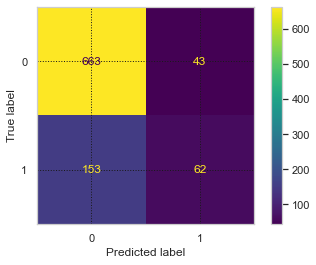

In [306]:
plot_confusion_matrix(LG_model,X_test,y_test)

With a logistic regression score of .79, we get 663 true positive and 43 false positive. We also get 153 false negatives and 62 true negatives.

In [309]:
print(classification_report(y_test,LG_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       706
           1       0.59      0.29      0.39       215

    accuracy                           0.79       921
   macro avg       0.70      0.61      0.63       921
weighted avg       0.76      0.79      0.76       921



In [297]:
#create a function for MAE, MSE, and RMSE using the predicted values
def error_calc(test,pred):
    MAE = mean_absolute_error(test,pred)
    MSE = mean_squared_error(test,pred)
    RMSE = np.sqrt(MSE)
    return MAE,MSE,RMSE

In [345]:
#use the function to calculate the error metrics for the logistics regression model
LG_MAE,LG_MSE,LG_RMSE = error_calc(y_test,LG_pred)
print('Logistic Regression Metrics:\nMAE: {}\nMSE: {}\nRMSE: {}\n'.format(LG_MAE,LG_MSE,LG_RMSE))

Logistic Regression Metrics:
MAE: 0.21281216069489686
MSE: 0.21281216069489686
RMSE: 0.4613156844232557



# SVM

In [321]:
#train using SVC()
svc_model= SVC()
svc_model.fit(X_train,y_train)
#print the score of the model
svc_model.score(X_test,y_test)

0.8175895765472313

In [319]:
svc_pred = svc_model.predict(X_test)
print(confusion_matrix(y_test,svc_pred))

[[667  39]
 [129  86]]


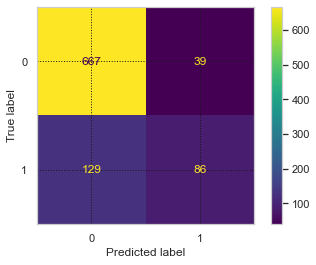

In [324]:
plot_confusion_matrix(svc_model,X_test,y_test)

In [325]:
#print classification report
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       706
           1       0.69      0.40      0.51       215

    accuracy                           0.82       921
   macro avg       0.76      0.67      0.70       921
weighted avg       0.80      0.82      0.80       921



Looks like we got a better score with SVM.

# Grid Search

In [339]:
#create a dictionary for the models and hyper parameters
model_params = {
    'svm':{'model':svm.SVC(gamma='auto'),
           'params':{'C':[1,10,20],
                     'kernel':['rbf','linear']}},
    'random_forest':{'model':RandomForestClassifier(),
                     'params':{'n_estimators':[1,5,10]}},
    'logistic_regression':{'model':LogisticRegression(solver='liblinear',multi_class='auto'),
                     'params':{'C':[1,5,10]}},
    'decision_tree':{'model':DecisionTreeClassifier(),
                     'params':{'criterion':['gini','entropy']}}
}

In [340]:
#create an empty list to save the scores
scores =[]

#create a loop to iterate through the parameters dictionary
for model_name, mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=5, return_train_score=False,n_jobs=14)
    clf.fit(X,y)
    #save the best scores in the scores list
    scores.append({'model':model_name,
                   'best_score':clf.best_score_,
                   'best_params':clf.best_params_})
    
#create a dataframe with the results
gs_df = pd.DataFrame(scores,columns=['model','best_score','best_params'])

gs_df

,model,best_score,best_params
0,svm,0.780635,"{'C': 20, 'kernel': 'linear'}"
1,random_forest,0.771168,{'n_estimators': 10}
2,logistic_regression,0.774767,{'C': 5}
3,decision_tree,0.724895,{'criterion': 'entropy'}


Looks like SVM has the best score.

# Final Model

In [364]:
#use svc and set C to 20
final_model = SVC(C=20,)
#fit the model
final_model.fit(X_train,y_train)

SVC(C=20)

In [365]:
final_pred = final_model.predict(X_test)

In [370]:
#print the finall confusion matrix
confusion_matrix(y_test,final_pred)

array([[650,  56],
       [ 98, 117]], dtype=int64)

In [368]:
print(classification_report(y_test,final_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       706
           1       0.68      0.54      0.60       215

    accuracy                           0.83       921
   macro avg       0.77      0.73      0.75       921
weighted avg       0.82      0.83      0.83       921



# Export model to a .pkl file

In [371]:
import pickle
#use pickle.dump to export model
pickle.dump(final_model,open('wine_svc.pkl','wb'))

In [374]:
#load the model
load_model=joblib.load('wine_svc.pkl')
load_model

SVC(C=20)

In [373]:
w_wine.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6


In [381]:
#predict using the values in the head of the dataframe
#create a function to predict the quality of wine
def wine_pred(var):
    prediction = load_model.predict(var)
    
    if prediction == 0:
        print("Low Quality Wine")
    else:
        print("High Quality Wine")

In [384]:
#create a list of values
values = [[7.0, 0.27, 0.36, 20.7, 0.045, 45.0, 170.0, 1.001, 3.0, 0.45, 8.8]]
#call the function to predict the values in the list
wine_pred(values)

Low Quality Wine


The quality in the first entry of the dataframe is 6, the SVC model predicted a 0 for Low Quality.